## CLEANING AND PRE-PROCESSING: NUMPY

#### Missing data, Outliers, Data Scaling

Objectives:
Performing basic cleaning and pre-processing of data.

Steps:
1. Check for missing data and handle them accordingly
2. Check for outliers
3. Scaling the data
4. Categorical data handling
5. Correlation of our variables

Resources:- Python libraries(pandas, numpy, matplotlib, seaborn)
          - [Boston Housing Dataset](https://www.kaggle.com/altavish/boston-housing-dataset)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
housing = pd.read_csv('Downloads/HousingData.csv') 
housing.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [3]:
housing.shape

(506, 14)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1. MISSING VALUES

There are several ways to detect missing values.
1. Using .info() above
2. Using the pandas dataframe function.isnull().

In [6]:
housing.isnull().any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [7]:
#we can play around with it
print('With the function .any()')
print(housing.isnull().any().sum())
print('Without the function .any()')
print(housing.isnull().sum())

With the function .any()
6
Without the function .any()
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


There are several ways we can use to plot a distribution of missing values per column, that is, visualize the missing values.
1. Using the .plot() and the .isnull() functions
2. Using missingno library


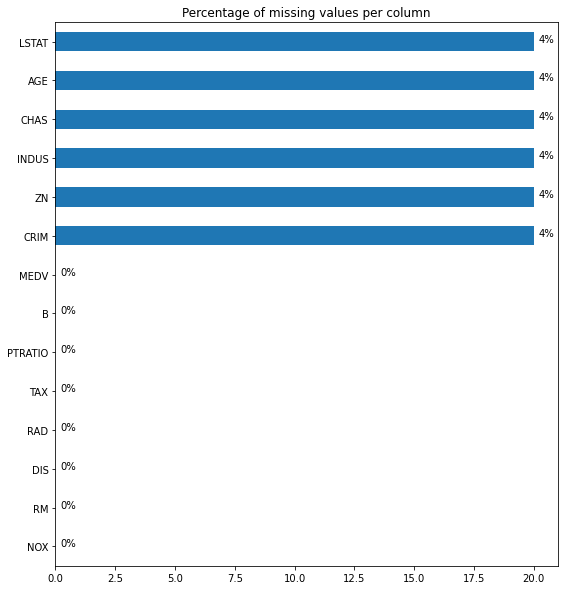

In [8]:
#plotting the graph
ax = housing.isnull().sum().sort_values().plot(kind='barh', figsize=(9,10));
plt.title('Percentage of missing values per column')
for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/housing.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    #print(width, height)
    x= p.get_x() + width + 0.2 
    y = p.get_y()+ height/2
    ax.annotate(percentage, (x,y))
    

#### 2. Using Missingno

The Missingno is the python library that has great use of exploring and visualizing the distribution of missing values. However, the graphs produced are static in nature as it is built on top of matplotlib.

In [9]:
!pip install missingno

In [10]:
import missingno as msno

Using Missingno library, we can depict missing values in many ways. Here we will be generating:
1. Bar Chart


<AxesSubplot:>

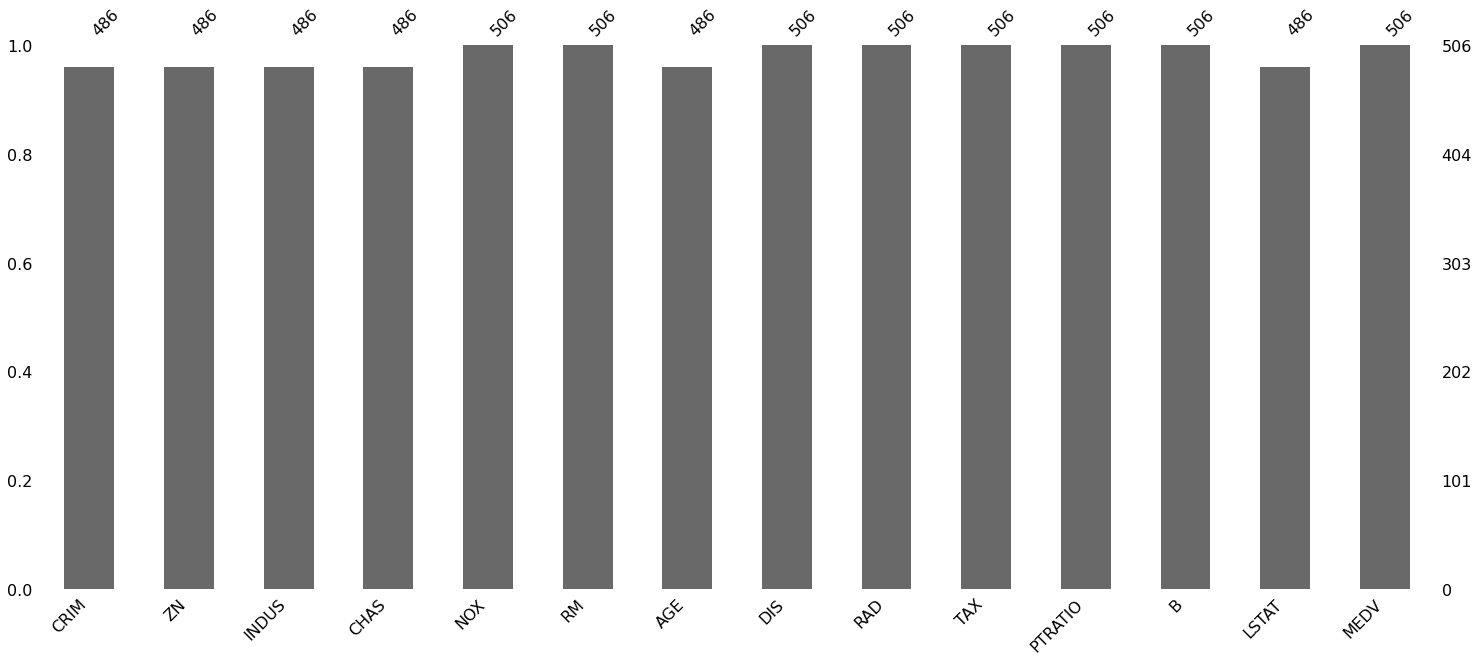

In [11]:
msno.bar(housing)

In [12]:
#msno.heatmap(housing)

## Handling Missing Data

In [13]:
There are several methods of handling missing data.
1. Using .fillna() to fill the missing values using suitable methods.
2. Dropping the missing data.
3. Sklearn imputer functions.

SyntaxError: invalid syntax (Temp/ipykernel_12092/3348746488.py, line 1)

## Outlier Detection

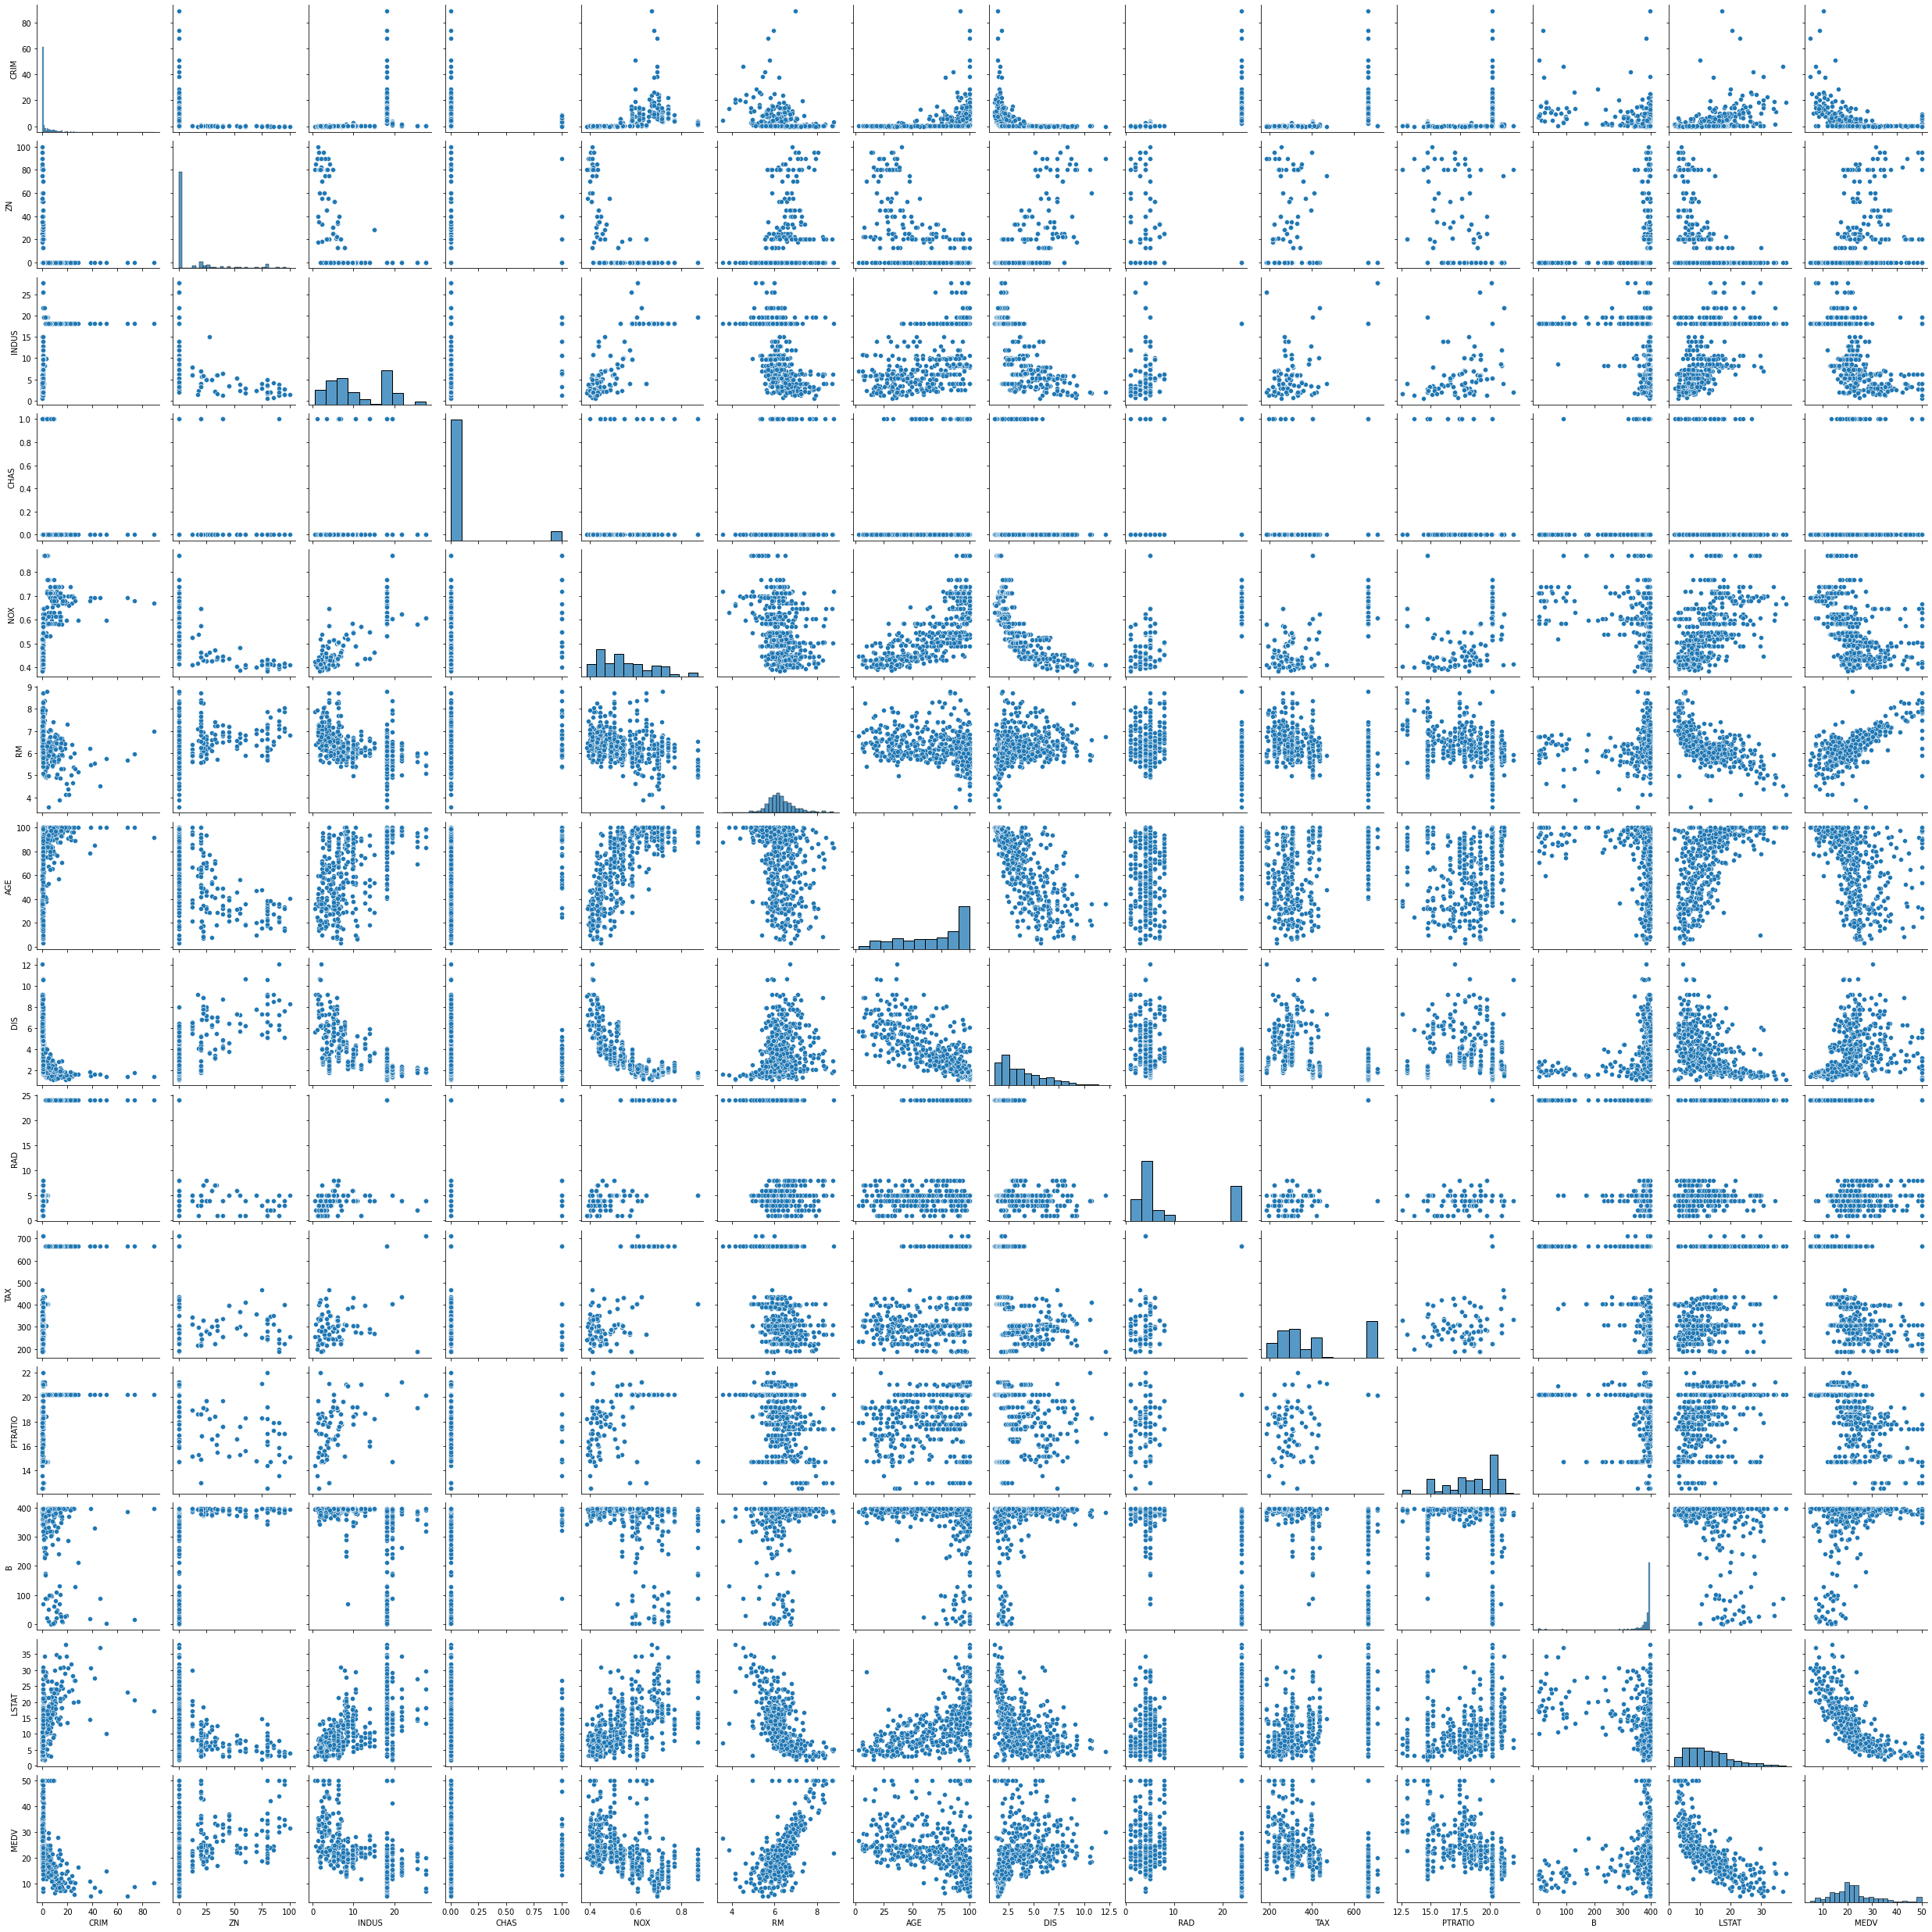

In [15]:
#We wil leverage seaborns' pairplot since we have a relarively small dataframe
#If the df was large, this would take up much computing power and we would need to find an alterntive method to cruise this
sns.pairplot(housing)

In [16]:
#Ways of rmoving outliers
#Scaling
#Normalization
#Drop all outliers--This is only viable when one has a large dataset.  

### 1. Normalization

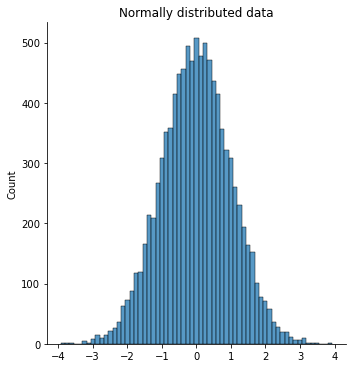

In [17]:
#we simulate a simple gaussian data distribution and normalize the data
#Let's first specify the size of our data
N= 10**4
np.random.seed(42)
gaussian_data = np.random.normal(size = N)#creating the randomly distribute data
skewed_data = np.random.lognormal(size = N)#creating a skewed dataset
sns.displot(gaussian_data)
plt.title('Normally distributed data');

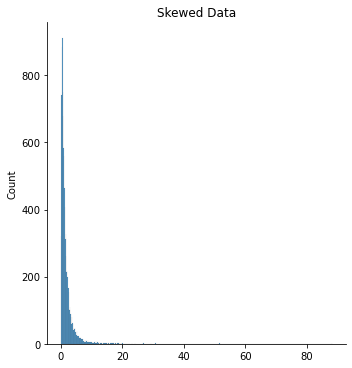

In [18]:
sns.displot(skewed_data)
plt.title('Skewed Data');


###### Normalization of the skewed data to remove outliers using log function

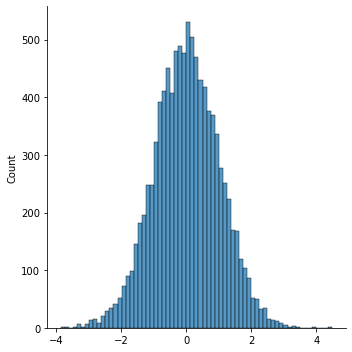

In [19]:
normalized_data =  np.log(skewed_data)
sns.displot(normalized_data);

Things to watch out for:
1. The log function won't always give you normal distribution. It will do its best, but this is never a guarantee.
2. Log function doesn't always give positive transforms with all data. It may return zero or infinity values thereby creating more noise in your data.

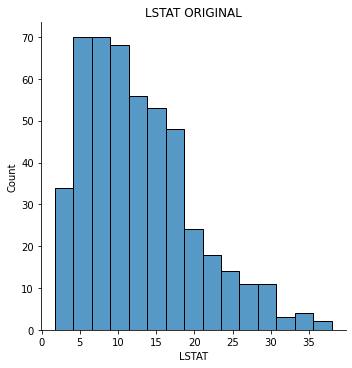

In [20]:
#We plot the column lstat 
sns.displot(housing['LSTAT']);
plt.title('LSTAT ORIGINAL');

We will consider values above 30 to be outliers in this example.
Let's normalize the distribution first.

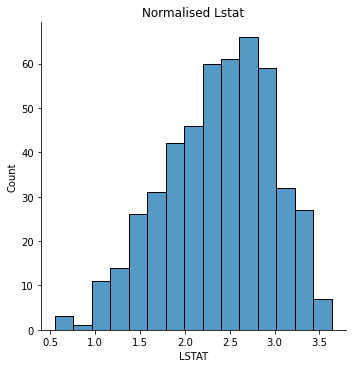

In [21]:
normalized_lstat =  np.log(housing['LSTAT'])
sns.displot(normalized_lstat);
plt.title('Normalised Lstat');

### 2. Dropping Outliers

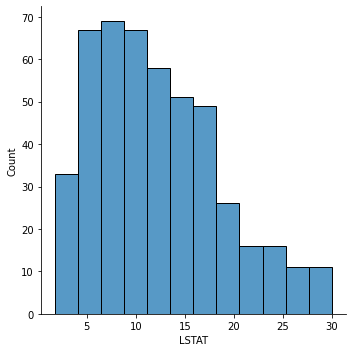

In [22]:
#dropping values above 30
lstat_nill_outliers = housing[housing['LSTAT']<=30]
sns.displot(lstat_nill_outliers['LSTAT'])

### 3. Scaling 

This fixes your data on a relatively lower scale.
We will use numpy in this case though python has inbuilt functions that can scale data.


$ x_(scaled) = x - x_{min} / x_{max} - x_{min} $

In [23]:
zone = housing['ZN']
np.min(zone), np.max(zone)

(0.0, 100.0)

In [24]:
#writing out the formula
def min_max_scaler (col):
    scaled_result = (col-np.min(col))/(np.max(col) - np.min(col))
    return  scaled_result
scaled_zone = min_max_scaler (zone)
np.min(scaled_zone),np.max(scaled_zone)

(0.0, 1.0)

## Handling Categotical Data

Categorical Data: Data that falls into more than one category i.e, numeric and string; examples: Location, year, hour.
This data is handled by encoding the categories. Commonly used tools are:
get_dummies by pandas
One hot encoding and label encoding by sklearn.
Frequency encoding is also used in cases where categories are inconsistent (for instance one category may be present in set A of data, maybe training data, and lack in set B, maybe testing
data. Read more encoding techniques here: https://towardsdatascience.com/all-about-categoricalvariable-encoding-305f3361fd02

In [25]:
no_missing_data = housing.dropna()
no_missing_data.CHAS.unique()

array([0., 1.])

In [27]:
# Using the get dummies function
col = ['CHAS']
encoded_df = pd.get_dummies(data = no_missing_data, columns=col)

In [28]:
encoded_df.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0.0,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1,0


pd.get_dummies will create columns that equal to the number of unique features of the categories. This can give you dimensionality problems when dealing with large datasets. Let's look at other methods of handling categorical data.

In [29]:
#frequency encoding

def frequency_encoder(df, col):
    fe = df.groupby(col).size()/len(df)
    df[col+"_encoded"] = df[col].map(fe)
    return df

In [30]:
freq_enc_df = frequency_encoder(no_missing_data, 'CHAS')

C:\Users\USER\AppData\Local\Temp/ipykernel_12092/1367678258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col+"_encoded"] = df[col].map(fe)


In [ ]:
#We can check the percentage/frequency of the unique features in the category
fre_enc_df.CHAS_encoded.unique()
